In [17]:
import torch
import numpy as np
import sys
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import hickle
import seaborn as sns

In [18]:
all_genes = pd.Series(np.load('/home/av622/all_aanet/aanet_results/reproduce_tnet_figure/all_genes.npy', allow_pickle=True))

In [6]:
data_path = '../data_in_vivo'
data_ptl = np.load(f'{data_path}/primary_csc_to_lung_noncsc.npz')
data_ptp = np.load(f'{data_path}/primary_csc_to_primary_noncsc.npz')
data_combined = np.load(f'{data_path}/combined_pc_2_timepoints.npz')

savepath = '../data_in_vivo'
savepath_ptl = f'{savepath}/ptl'
savepath_ptp = f'{savepath}/ptp'

# adata = sc.read_h5ad(f'../data_new_hvg5000/{data_name}_meld.h5ad')
# adata.obs['dpt_bin'] = pd.cut(adata.obs['meld_likelihood'], bins=4, labels=False)

# gene_names = adata.var_names

# data = np.load(f'{datapath}_gaga.npz')
traj_ptl = np.load(f'{savepath_ptl}/mioflow_results/trajectories_phate.npy')
traj_ptp = np.load(f'{savepath_ptp}/mioflow_results/trajectories_phate.npy')



In [13]:
pc_op = hickle.load(f'{data_path}/tnet_combined_pc_op_updated.hkl')
scaler = 12.893932987398726 # scaled before trajectorynet

In [15]:
traj_ptl_flat = traj_ptl.reshape(-1, traj_ptl.shape[-1])
traj_ptl_gene_sp_flat = pc_op.inverse_transform(traj_ptl_flat)
traj_ptl_gene_sp = traj_ptl_gene_sp_flat.reshape(traj_ptl.shape[0], traj_ptl.shape[1], -1)
traj_ptl_gene_sp = traj_ptl_gene_sp * scaler

In [30]:
traj_ptp_flat = traj_ptp.reshape(-1, traj_ptp.shape[-1])
traj_ptp_gene_sp_flat = pc_op.inverse_transform(traj_ptp_flat)
traj_ptp_gene_sp = traj_ptp_gene_sp_flat.reshape(traj_ptp.shape[0], traj_ptp.shape[1], -1)
traj_ptp_gene_sp = traj_ptp_gene_sp * scaler

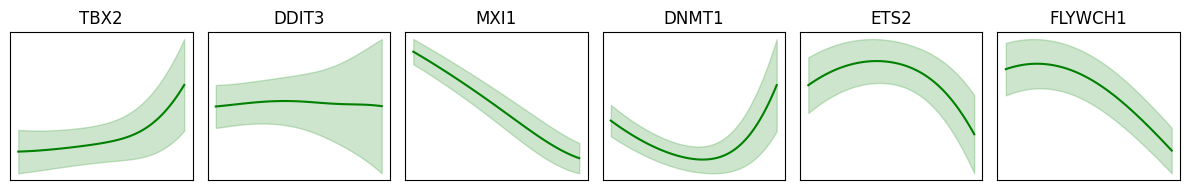

In [28]:
to_plot_gene = ['TBX2', 'DDIT3', 'MXI1', 'DNMT1', 'ETS2', 'FLYWCH1']

to_plot_gene_mask = all_genes.isin(to_plot_gene)

traj_gene_sp_this = traj_ptl_gene_sp

x_time = np.linspace(0, 1, traj_gene_sp_this.shape[0])


decoded_to_plot_gene = traj_gene_sp_this[:, :, to_plot_gene_mask]
decoded_to_plot_gene_mean = decoded_to_plot_gene.mean(axis=1)
decoded_to_plot_gene_std = decoded_to_plot_gene.std(axis=1)


n_genes = decoded_to_plot_gene_mean.shape[1]
n_rows = 1
n_cols = n_genes

fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*n_cols, 2))
if n_genes == 1:
    axes = [axes]  # Make sure axes is iterable even with one subplot

for i in range(n_genes):
    ax = axes[i]
    ax.plot(x_time, decoded_to_plot_gene_mean[:,i], color='green', label=f'Decoded {to_plot_gene[i]}')
    ax.fill_between(x_time, decoded_to_plot_gene_mean[:,i] - decoded_to_plot_gene_std[:,i], decoded_to_plot_gene_mean[:,i] + decoded_to_plot_gene_std[:,i], color='green', alpha=0.2)
    ax.set_title(to_plot_gene[i])
    # drop ticks
    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   labelbottom=False, right=False, left=False, labelleft=False)

plt.tight_layout()
# Add suptitle with padding
# plt.subplots_adjust(top=0.85)  # Leave space at top
# plt.suptitle('Gene Trends', y=0.98)  # Position suptitle in the space

plt.show()


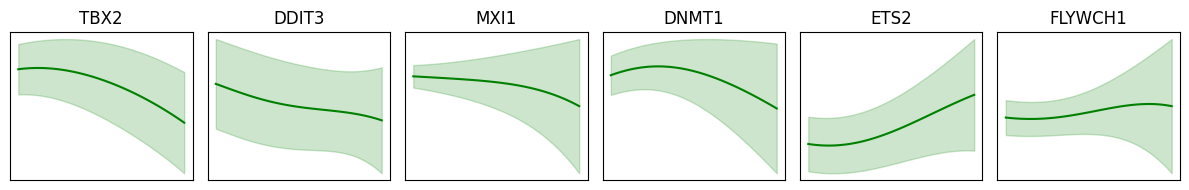

In [31]:
to_plot_gene = ['TBX2', 'DDIT3', 'MXI1', 'DNMT1', 'ETS2', 'FLYWCH1']

to_plot_gene_mask = all_genes.isin(to_plot_gene)

traj_gene_sp_this = traj_ptp_gene_sp

x_time = np.linspace(0, 1, traj_gene_sp_this.shape[0])


decoded_to_plot_gene = traj_gene_sp_this[:, :, to_plot_gene_mask]
decoded_to_plot_gene_mean = decoded_to_plot_gene.mean(axis=1)
decoded_to_plot_gene_std = decoded_to_plot_gene.std(axis=1)


n_genes = decoded_to_plot_gene_mean.shape[1]
n_rows = 1
n_cols = n_genes

fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*n_cols, 2))
if n_genes == 1:
    axes = [axes]  # Make sure axes is iterable even with one subplot

for i in range(n_genes):
    ax = axes[i]
    ax.plot(x_time, decoded_to_plot_gene_mean[:,i], color='green', label=f'Decoded {to_plot_gene[i]}')
    ax.fill_between(x_time, decoded_to_plot_gene_mean[:,i] - decoded_to_plot_gene_std[:,i], decoded_to_plot_gene_mean[:,i] + decoded_to_plot_gene_std[:,i], color='green', alpha=0.2)
    ax.set_title(to_plot_gene[i])
    # drop ticks
    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   labelbottom=False, right=False, left=False, labelleft=False)

plt.tight_layout()
# Add suptitle with padding
# plt.subplots_adjust(top=0.85)  # Leave space at top
# plt.suptitle('Gene Trends', y=0.98)  # Position suptitle in the space

plt.show()
